In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [2]:
from glob import glob
data = glob('C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\*\*\*')
data

['C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1001_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1051_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1101_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1151_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1201_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1251_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1301_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1351_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1401_class0.png',
 

In [3]:
len(data)

81141

In [4]:
import cv2
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [5]:
x=np.stack(images)

In [6]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [7]:
x=x/255

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [9]:
!pip install livelossplot

In [10]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

C:\Users\PRERNA MISHRA\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
callbacks=[PlotLossesKeras()]

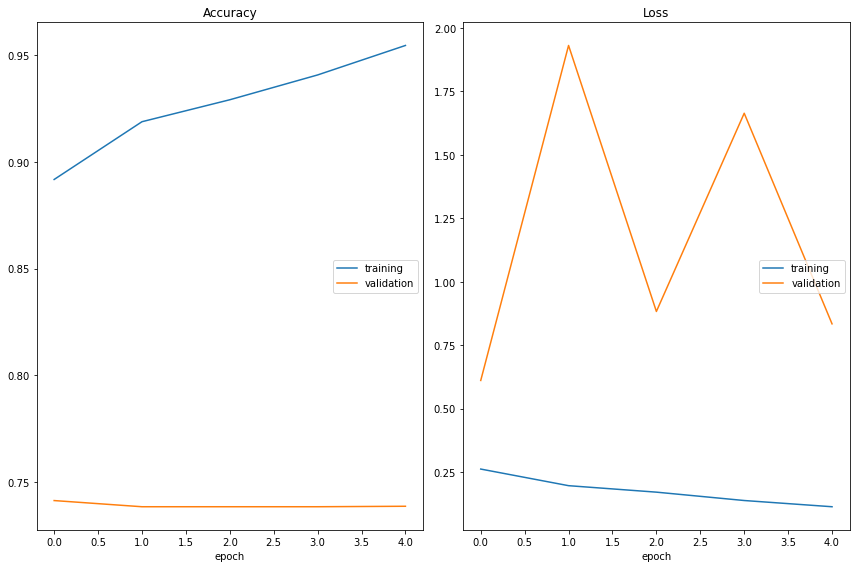

Accuracy
	training         	 (min:    0.892, max:    0.954, cur:    0.954)
	validation       	 (min:    0.738, max:    0.741, cur:    0.739)
Loss
	training         	 (min:    0.113, max:    0.261, cur:    0.113)
	validation       	 (min:    0.611, max:    1.931, cur:    0.834)
350/350 [==============================] - 562s 2s/step - loss: 0.1129 - acc: 0.9545 - val_loss: 0.8339 - val_acc: 0.7387
Epoch 6/20
321/350 [==========================>...] - ETA: 39s - loss: 0.0911 - acc: 0.9632

In [ ]:
history=model.fit(x,y,epochs=20,validation_split=0.3,batch_size=30, callbacks=[PlotLossesKeras(), monitor_val_acc])

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)